### In this notebook we are going to conduct a PCA analysis on our Dataset

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

#### 1- load the data

In [156]:
file_path = "music_genre.csv"
data = pd.read_csv(file_path)
print(data.describe())

        instance_id    popularity  acousticness  danceability   duration_ms  \
count  50000.000000  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   55888.396360     44.220420      0.306383      0.558241  2.212526e+05   
std    20725.256253     15.542008      0.341340      0.178632  1.286720e+05   
min    20002.000000      0.000000      0.000000      0.059600 -1.000000e+00   
25%    37973.500000     34.000000      0.020000      0.442000  1.748000e+05   
50%    55913.500000     45.000000      0.144000      0.568000  2.192810e+05   
75%    73863.250000     56.000000      0.552000      0.687000  2.686122e+05   
max    91759.000000     99.000000      0.996000      0.986000  4.830606e+06   

             energy  instrumentalness      liveness      loudness  \
count  50000.000000      50000.000000  50000.000000  50000.000000   
mean       0.599755          0.181601      0.193896     -9.133761   
std        0.264559          0.325409      0.161637      6.162990   
min        0

#### 2 - drop missing values

In [157]:
print("len data", len(data))
data.dropna(axis=0, inplace=True)
id_df = data[['instance_id']].copy() 
id_df.reset_index(drop=True, inplace=True)  # Resetting index to match the reduced dataset

len data 50005


### 3 -  scale the data

In [158]:
from sklearn.preprocessing import StandardScaler

data = data.select_dtypes(include=['float64', 'int64'])
omitted_col = data['instance_id']
print("len omit", len(data))
print("len omit", len(omitted_col))
data = data.drop(columns=['instance_id'])
data.head()
# instanciate scaler object
scaler = StandardScaler()
print("Missing values after dropping:", data.isnull().sum().sum())
# # fit scaler to our data
data_scaled = scaler.fit_transform(data)

len omit 50000
len omit 50000
Missing values after dropping: 0


#### 4 - fit the data to the PCA

In [159]:
from sklearn.decomposition import PCA

# instanciate a PCA object
pca = PCA() 

# fit the object to our data
pca.fit(data_scaled)

# apply PCA to our data to get new coordinates
data_pca = pca.transform(data_scaled)

In [160]:
# Explained variance (eigenvalues)
print("Explained variance")
print(pca.explained_variance_)

# Corrected variance values 
n = len(data_pca) # number of samples
corrected_variance = (n/(n-1))*pca.explained_variance_
print("\nCorrected variance")
print(corrected_variance)

Explained variance
[3.63099752 1.27630299 1.05045842 0.97926197 0.87029458 0.7505588
 0.60413842 0.47045433 0.25689641 0.11083655]

Corrected variance
[3.63107014 1.27632852 1.05047943 0.97928156 0.87031198 0.75057381
 0.6041505  0.47046374 0.25690155 0.11083877]


#### Choice of number of commponents
**The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:**

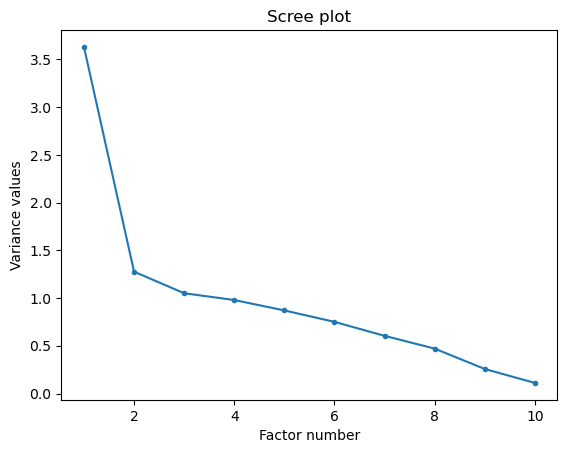

In [161]:
p = data_pca.shape[1] # number of components
plt.plot(np.arange(1,p+1),corrected_variance, marker='.')
plt.title("Scree plot")
plt.ylabel("Variance values")
plt.xlabel("Factor number")
plt.show()

**This plot shows the variance explained by each component. The first component explains the most variance, then the second... This plot is a visual representation of the `corrected variance` we printed above.**

In [162]:
pca.explained_variance_ratio_*100

array([36.30924899, 12.76277467, 10.50437413,  9.79242386,  8.7027717 ,
        7.50543792,  6.04126338,  4.70444924,  2.56891274,  1.10834337])

#### Using the cumulative variance to exmplain the extent to wich every PC explains the Total variance 

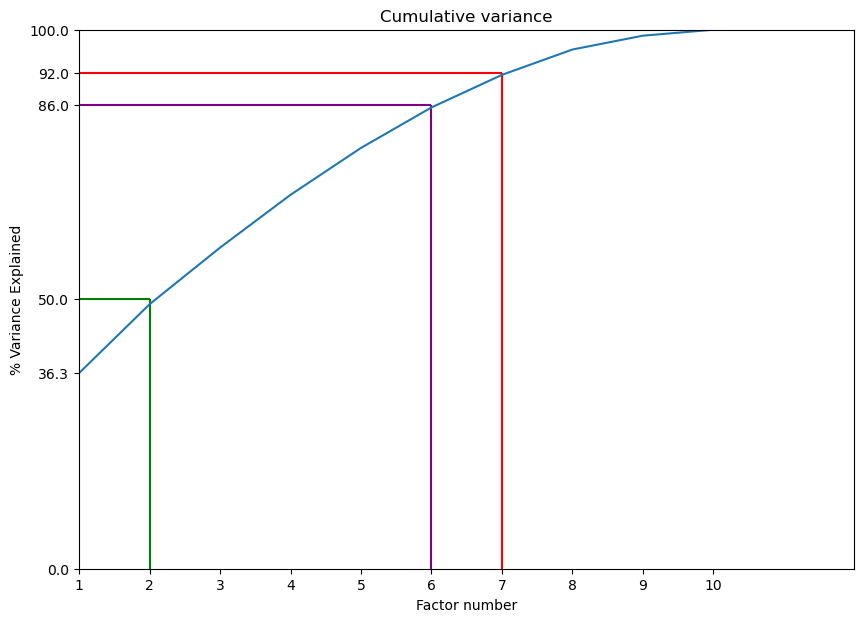

In [163]:
# plot the cumulative variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
plt.figure(figsize=(10,7))
plt.title("Cumulative variance")
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')

plt.hlines(y=92.0, xmin=0, xmax=7, color='red')
plt.vlines(x=7.0, ymin=0, ymax=92,color='red')

plt.hlines(y=86.0,xmin=0, xmax=6, color='purple')
plt.vlines(x=6.0, ymin=0, ymax=86, color='purple')

plt.hlines(y=50.0, xmin=0, xmax=2, color='green')
plt.vlines(x=2.0,ymin=0, ymax=50, color='green')

plt.ylim(0,100)
plt.xlim(1,12)
plt.yticks([0,36.3, 50, 86, 92,100])
plt.xticks([1,2,3,4,5, 6, 7, 8, 9, 10])
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)
plt.show()

#### Observation:
**As we can see on the figure in purple, 6 components are enough to explain 86% of the variance. This seems to be a good compromise: we explain most of the variance, while reducing the number of factors by almost half. 
the remainig 4 components exaplin roughly 14% of information, it means that they carry out little information compared to the other components**

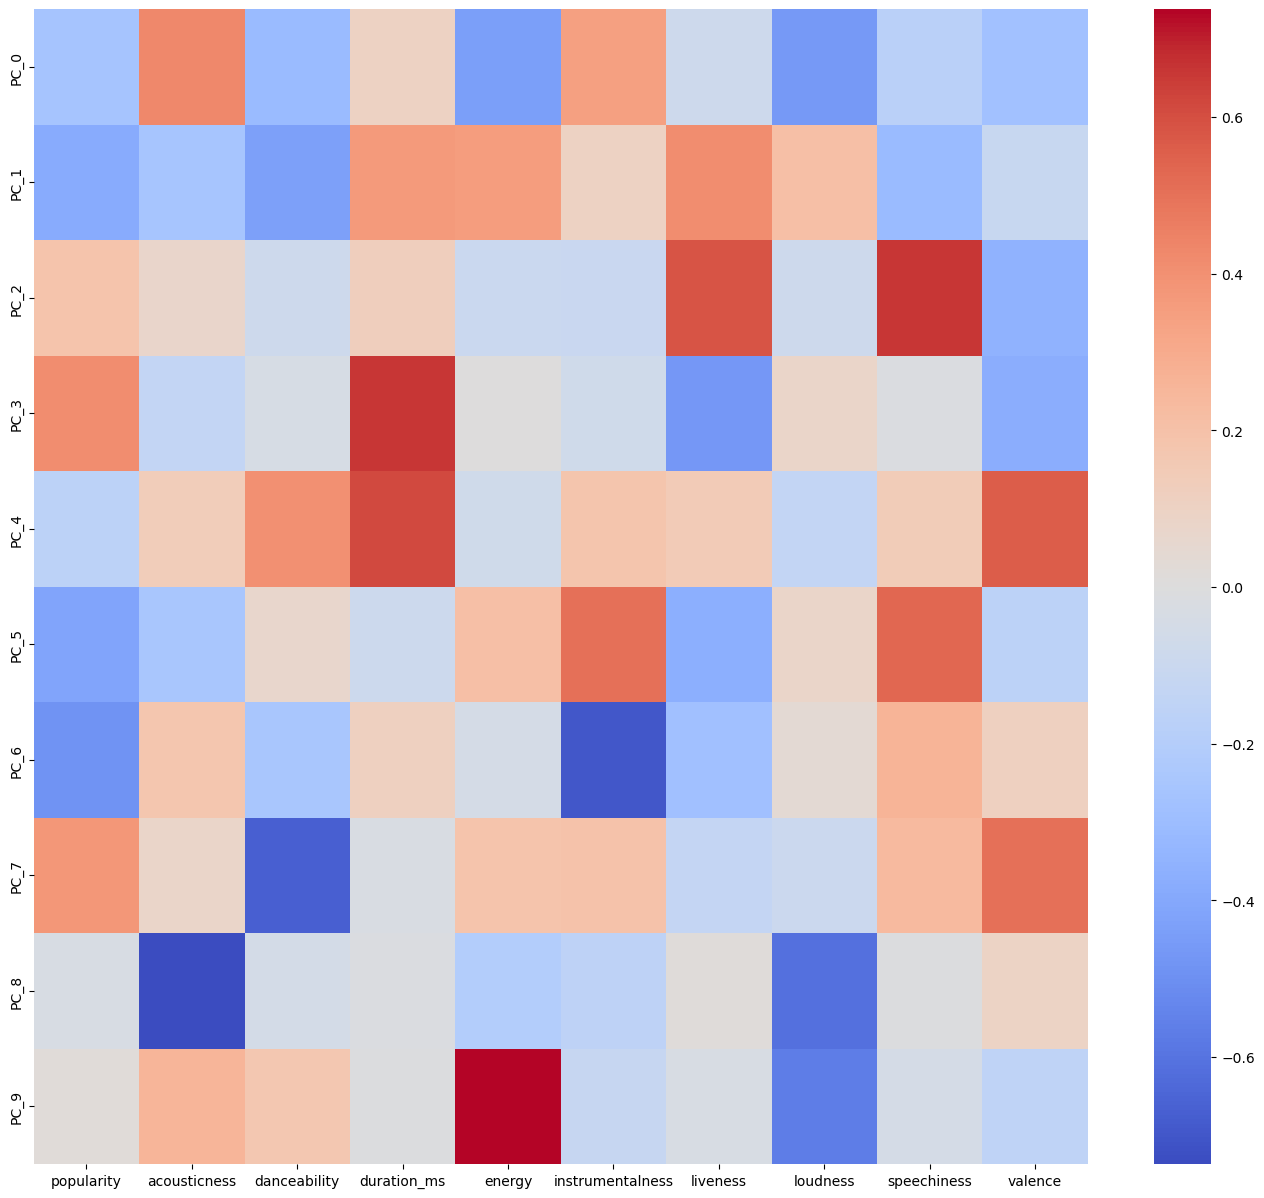

In [164]:
components = pd.DataFrame(pca.components_, columns=data.columns, index=[f"PC_{i}" for i in range(len(pca.components_))])

plt.figure(figsize=(17,15))
sns.heatmap(components,cmap='coolwarm',)
plt.show()

#### Correlation Circle

In [165]:
# Compute the correlation of the variables with the principal axes
sqrt_cor_var = np.sqrt(corrected_variance)
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

# Print the correlation matrix "variables x factors"
print(corvar)

[[-0.49446835 -0.43772313  0.19245305  0.40533558 -0.15025342 -0.36022513
  -0.37783127  0.25916897 -0.01682243  0.00762561]
 [ 0.81357574 -0.28647467  0.07692825 -0.13611598  0.12810926 -0.2143363
   0.13864136  0.05507469 -0.37356911  0.08637534]
 [-0.5965579  -0.49176397 -0.08718604 -0.03712046  0.37187092  0.05831759
  -0.19297769 -0.45879458 -0.02802252  0.05604012]
 [ 0.19376752  0.41632648  0.12565093  0.65557852  0.57468386 -0.07528461
   0.08584113 -0.01585455 -0.00650193 -0.00184555]
 [-0.83946959  0.39826941 -0.10006578  0.00122631 -0.0676898   0.18338578
  -0.03567368  0.12797961 -0.10255632  0.2455935 ]
 [ 0.65426523  0.11425817 -0.1083036  -0.07322775  0.17073815  0.43542489
  -0.54529596  0.13314735 -0.08015868 -0.03977996]
 [-0.16357309  0.46535643  0.60104411 -0.4640753   0.13893809 -0.32290888
  -0.22055441 -0.08793019  0.00801176 -0.0096565 ]
 [-0.87911234  0.2376733  -0.08565715  0.07840436 -0.12639287  0.06547982
   0.02830497 -0.06369233 -0.31104162 -0.18804514]
 

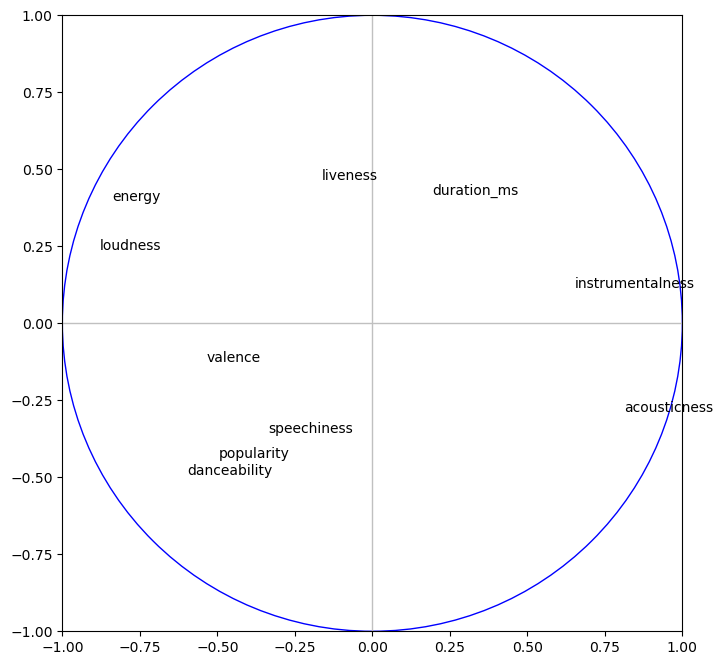

In [166]:
# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

#### Observation:
As we can see on the figure, we have intrumentalness and acousticness are at the edge of the circle, we also have energy and loudness that are close to te edge but not there yet, it means that with our first and second components we can exmplain very well the intrumentalness and acousticness, we also can explain energy and loudness but it wouldn't be as accurate as the first two since they are not exactly at the edge like intrumentalness and acousticness

## Dimensionality reduction

**Once we have studied the results of PCA, decided whether reducing the dimension of our dataset was a good idea or not, and if so, how many components to keep, we can reduce the dimensionality of our dataset. It is then this reduced dataset that will be used in downstream analyses like clustering.**

In [167]:
# When we looked at cumulative variance, we decided that the first 30 components
# were enough to get a good representation of our data, so we create a new data 
# object and only keep the first 30 components as variables

data_reduc = data_pca[:,:6]
df = pd.DataFrame(data_reduc)

data_reduc_df = pd.concat([id_df, pd.DataFrame(data_reduc)], axis=1)

data_reduc_df.to_csv("data_reduc.csv")
print("Missing values after dropping:", df.isnull().sum().sum())
df.head()

Missing values after dropping: 0


,0,1,2,3,4,5
0,-0.916414,0.290939,-1.752115,-1.806016,-0.037421,2.011713
1,-0.026535,1.066885,-1.419117,-0.305891,0.472091,1.814158
2,-0.934814,1.877429,0.664439,-1.039847,-0.129844,-0.416175
3,-1.327505,-0.444302,0.702863,-0.013578,-0.274792,1.429543
4,0.523755,0.773313,-0.804965,-0.022155,0.127977,1.620727


### Next Steps:

with the help of our new reduced dataset we will carry out further analysis like clustering to see of our data is still relevant to it's original form